In [25]:
# Imports
import gymnasium as gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [26]:
# Load the model
model_path = "models/dqn_cartpole.keras"

# Load the model 
q_network = load_model(model_path)

In [27]:
# Environment
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode="rgb_array")  # Updated for visualizing results
state_shape = env.observation_space.shape[0]
action_size = env.action_space.n

In [28]:
# Test the Agent
episodes = 10
episode_rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    while not done:
        q_values = q_network.predict(np.expand_dims(state, axis=0), verbose=0)
        action = np.argmax(q_values)

        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        state = next_state

        # Stop the episode if total reward reaches 1000
        if total_reward >= 1000:
            print(f"Episode {episode+1}: Reward reached 1000, stopping early.")
            done = True

    episode_rewards.append(total_reward)
    print(f"Episode {episode+1}/{episodes}: Total Reward = {total_reward}")


env.close()




Episode 1: Reward reached 1000, stopping early.
Episode 1/10: Total Reward = 1000.0
Episode 2: Reward reached 1000, stopping early.
Episode 2/10: Total Reward = 1000.0
Episode 3: Reward reached 1000, stopping early.
Episode 3/10: Total Reward = 1000.0
Episode 4: Reward reached 1000, stopping early.
Episode 4/10: Total Reward = 1000.0
Episode 5: Reward reached 1000, stopping early.
Episode 5/10: Total Reward = 1000.0
Episode 6: Reward reached 1000, stopping early.
Episode 6/10: Total Reward = 1000.0
Episode 7: Reward reached 1000, stopping early.
Episode 7/10: Total Reward = 1000.0
Episode 8: Reward reached 1000, stopping early.
Episode 8/10: Total Reward = 1000.0
Episode 9: Reward reached 1000, stopping early.
Episode 9/10: Total Reward = 1000.0
Episode 10: Reward reached 1000, stopping early.
Episode 10/10: Total Reward = 1000.0


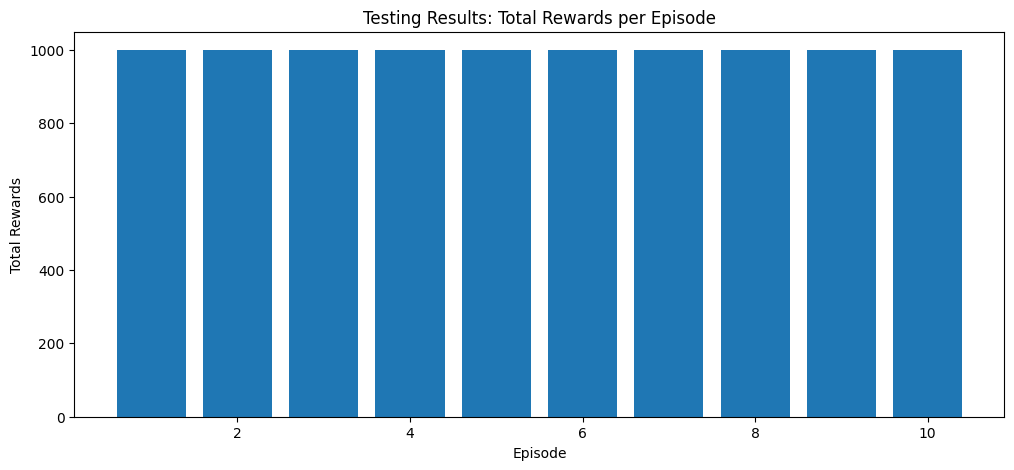

In [29]:
# Plot Testing Results
plt.figure(figsize=(12, 5))
plt.bar(range(1, episodes + 1), episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Rewards")
plt.title("Testing Results: Total Rewards per Episode")
plt.show()